In [1]:
!which python

/home/user/jfayzullaev/stellar-clustering/.venv-vis/bin/python


In [2]:
import pandas as pd
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics import normalized_mutual_info_score, adjusted_rand_score
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np


In [3]:
LBL_NORM = "~/stellar-clustering/network/labled-data/labels/label-normalization/labels_entities_normalized.csv"

## Transaction

silhouette, Davies–Bouldin, and Calinski–Harabasz

In [19]:
FN = "transactions/transactions_node2vec_kmeans_results.csv" 
df = pd.read_csv(FN)

In [41]:
X = df[[c for c in df.columns if c.startswith("z")]].values

In [ ]:
k_cols = [c for c in df.columns if c.startswith("kmeans_")]
rows = []
for col in k_cols:
    y = df[col].values
    k = int(col.split("_")[1])
    print(f"Scoring k={k}")
    sil = silhouette_score(X, y, metric="euclidean")
    db  = davies_bouldin_score(X, y)
    ch  = calinski_harabasz_score(X, y)
    rows.append({"k": k, "silhouette": sil, "davies_bouldin": db, "calinski_harabasz": ch})

out = pd.DataFrame(rows).sort_values("k")
out.to_csv("transactions/transaction_kmeans_intrinsic_scores.csv", index=False)
print(out)
print("\nSaved")

Scoring k=10 ...
Scoring k=15 ...
Scoring k=20 ...
Scoring k=30 ...
Scoring k=40 ...
Scoring k=50 ...
Scoring k=65 ...
Scoring k=70 ...
Scoring k=75 ...
Scoring k=80 ...
Scoring k=100 ...
Scoring k=120 ...
Scoring k=150 ...
Scoring k=180 ...
Scoring k=210 ...
Scoring k=250 ...
Scoring k=300 ...
Scoring k=350 ...
Scoring k=400 ...
      k  silhouette  davies_bouldin  calinski_harabasz
0    10    0.574917        1.551776       67982.810145
1    15    0.399444        1.787155       53580.961934
2    20    0.401493        1.716617       43636.010492
3    30    0.132163        2.146564       32149.806980
4    40    0.127881        2.065327       26322.770490
5    50    0.116577        2.124993       22436.902057
6    65    0.117090        2.056876       18494.198301
7    70    0.103814        2.123531       17539.224330
8    75    0.090415        2.157605       16614.402884
9    80    0.100821        2.123745       15890.029745
10  100    0.093342        2.206866       13304.807997
11  120 

In [3]:
intr = pd.read_csv("transactions/transaction_kmeans_intrinsic_scores.csv").sort_values("k")

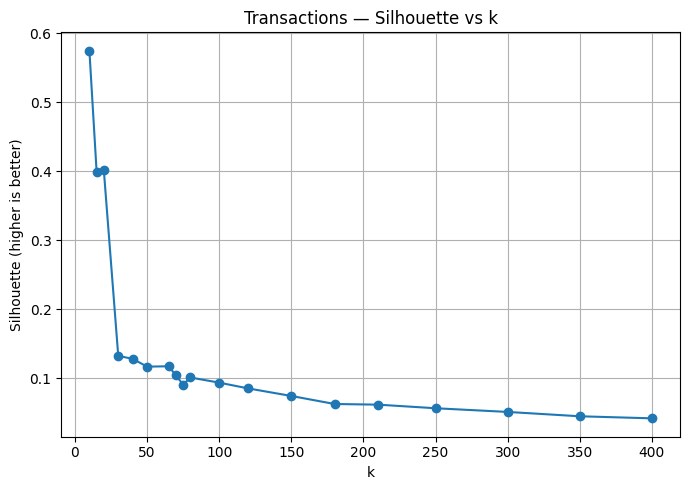

In [4]:
plt.figure(figsize=(7,5))
plt.plot(intr["k"], intr["silhouette"], marker="o")
plt.xlabel("k"); plt.ylabel("Silhouette (higher is better)")
plt.title("Transactions — Silhouette vs k")
plt.grid(True, which="both", axis="both")
plt.tight_layout(); plt.show()

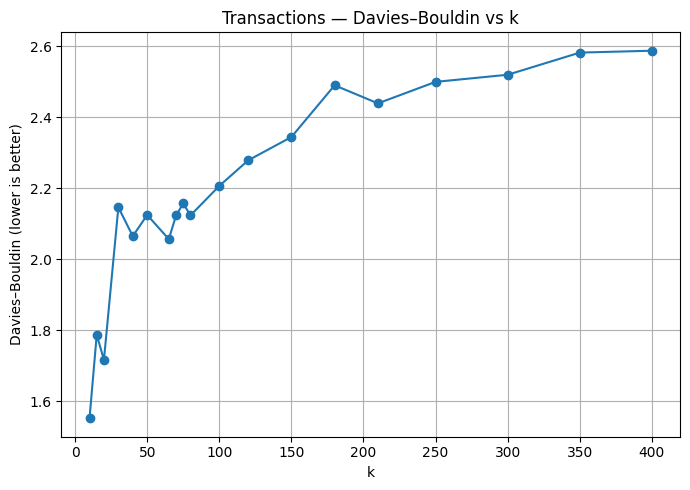

In [ ]:
# Davies–Bouldin
plt.figure(figsize=(7,5))
plt.plot(intr["k"], intr["davies_bouldin"], marker="o")
plt.xlabel("k"); plt.ylabel("Davies–Bouldin (lower is better)")
plt.title("Transactions — Davies–Bouldin vs k")
plt.grid(True, which="both", axis="both")
plt.tight_layout(); plt.show()

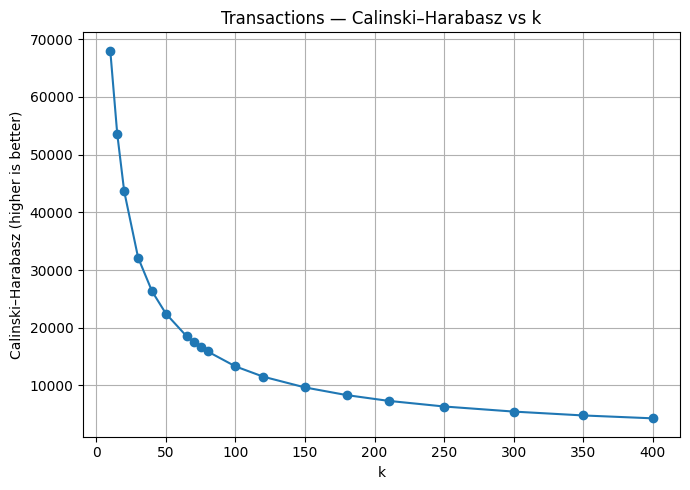

In [46]:
plt.figure(figsize=(7,5))
plt.plot(intr["k"], intr["calinski_harabasz"], marker="o")
plt.xlabel("k"); plt.ylabel("Calinski–Harabasz (higher is better)")
plt.title("Transactions — Calinski–Harabasz vs k")
plt.grid(True, which="both", axis="both")
plt.tight_layout(); plt.show()

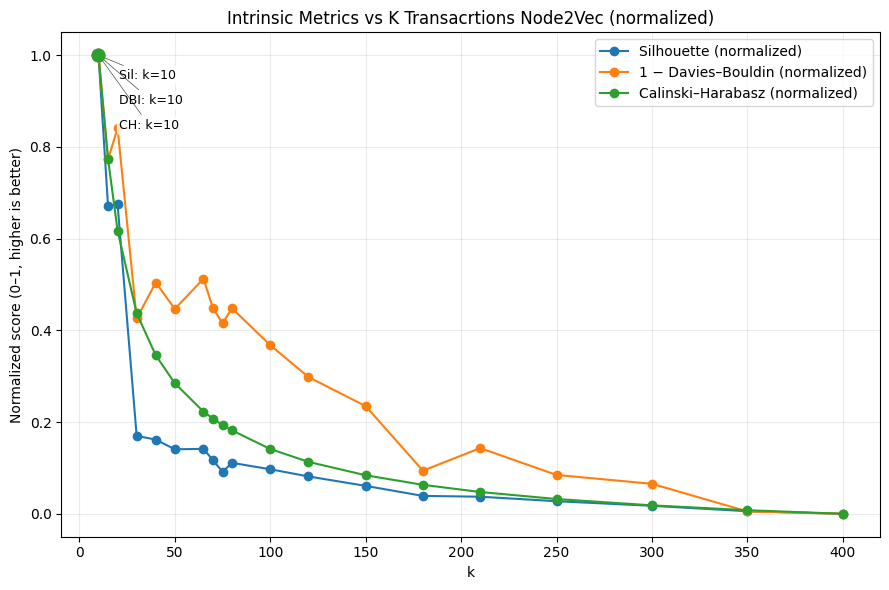

In [18]:
plt.figure(figsize=(9,6))
plt.plot(k, sil_n, marker="o", label="Silhouette (normalized)")
plt.plot(k, dbi_n, marker="o", label="1 − Davies–Bouldin (normalized)")
plt.plot(k, ch_n,  marker="o", label="Calinski–Harabasz (normalized)")


ann_cfg = [
    (best_sil_idx, "Sil: k={}".format(int(k[best_sil_idx])), sil_n),
    (best_dbi_idx, "DBI: k={}".format(int(k[best_dbi_idx])), dbi_n),
    (best_ch_idx,  "CH: k={}".format(int(k[best_ch_idx])),  ch_n),
]


offsets = [(15, -10), (15, -28), (15, -46)]  

for (idx, label, series), (dx, dy) in zip(ann_cfg, offsets):
    x_val = k[idx]
    y_val = series.iloc[idx]

    plt.scatter([x_val], [y_val], s=80, zorder=5)
    plt.annotate(
        label,
        xy=(x_val, y_val),
        xytext=(dx, dy),         
        textcoords="offset points", 
        ha="left",
        va="top",
        fontsize=9,
        bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="none", alpha=0.85),
        arrowprops=dict(arrowstyle="-", lw=0.5, alpha=0.7),
    )

plt.xlabel("k")
plt.ylabel("Normalized score (0–1, higher is better)")
plt.title("Intrinsic Metrics vs K Transacrtions Node2Vec (normalized)")
plt.grid(True, which="both", axis="both", alpha=0.25)
plt.legend()
plt.tight_layout()
plt.show()


In [4]:
EMB_FN = "transactions/transactions_node2vec_kmeans_results.csv"
# LPA_FN = "../Community Detection/Label Propagation/transaction/transactions_lpa_labels.csv"

In [5]:
emb = pd.read_csv(EMB_FN)
# lpa = pd.read_csv(LPA_FN)[["account_id","lpa_label"]]
lblnorm = pd.read_csv(LBL_NORM)[["account_id","name"]]

In [6]:
for col in ["account_id"]:
    try:
        emb[col] = emb[col].astype("Int64")
        lblnorm[col] = lblnorm[col].astype("Int64")
    except Exception:
        emb[col] = emb[col].astype(str)
        lblnorm[col] = lblnorm[col].astype(str)

# evaluate only on accounts present in both
df = emb.merge(lblnorm, on="account_id", how="inner")
print(f"Matched accounts for extrinsic eval: {len(df):,} / {len(emb):,}")


Matched accounts for extrinsic eval: 397 / 206,451


In [7]:
df_eval = df

In [8]:
k_cols = sorted([c for c in df_eval.columns if c.startswith("kmeans_")],
                key=lambda s: int(s.split("_")[1]))


In [9]:
def purity(y_true, y_pred):
    if len(y_true) == 0:
        return float("nan")
    total = len(y_true)
    score = 0
    for c in set(y_pred):
        idx = (y_pred == c)
        if idx.any():
            score += Counter(y_true[idx]).most_common(1)[0][1]
    return score / total

In [10]:
for col in ["account_id"]:
    try:
        emb[col] = emb[col].astype("Int64")
        lblnorm[col] = lblnorm[col].astype("Int64")
    except Exception:
        emb[col] = emb[col].astype(str)
        lblnorm[col] = lblnorm[col].astype(str)

In [11]:
df = emb.merge(lblnorm, on="account_id", how="inner")
k_cols = [c for c in emb.columns if c.startswith("kmeans_")]

In [12]:
rows = []

y_ref = df["name"].to_numpy()
for kcol in k_cols:
    y = df[kcol].to_numpy()
    k = int(kcol.split("_")[1])
    rows.append({
        "k": k,
        "NMI_vs_LPA": normalized_mutual_info_score(y_ref, y),
        "ARI_vs_LPA": adjusted_rand_score(y_ref, y),
        "Purity_vs_LPA": purity(y_ref, y),
    })

ext = pd.DataFrame(rows).sort_values("k").reset_index(drop=True)
display(ext)

,k,NMI_vs_LPA,ARI_vs_LPA,Purity_vs_LPA
0,10,0.271205,0.075760,0.715365
1,15,0.299066,0.053900,0.735516
2,20,0.323868,0.057340,0.748111
3,30,0.302560,0.047597,0.750630
4,40,0.315282,0.049914,0.760705
5,50,0.360435,0.080826,0.780856
6,65,0.359038,0.062618,0.780856
7,70,0.355653,0.049900,0.780856
8,75,0.347724,0.040309,0.778338
9,80,0.364026,0.075800,0.783375


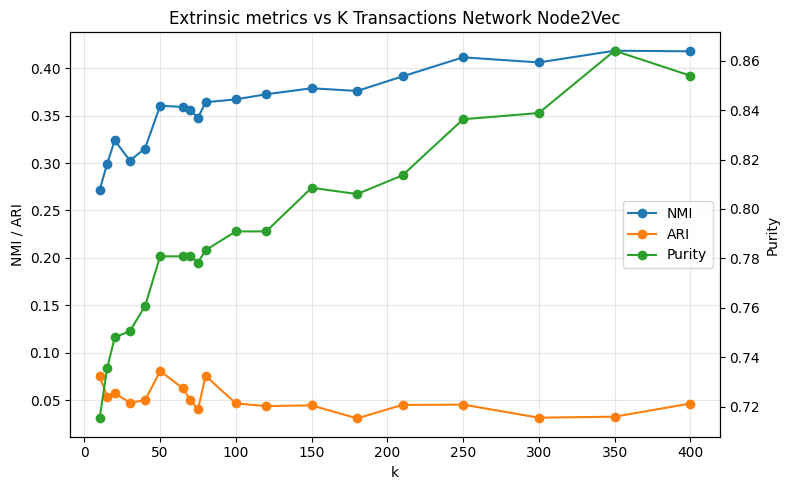

In [14]:
k   = ext["k"].astype(int)
nmi = ext["NMI_vs_LPA"]
ari = ext["ARI_vs_LPA"]
pur = ext["Purity_vs_LPA"]

fig, ax1 = plt.subplots(figsize=(8,5))
ax2 = ax1.twinx()

l1, = ax1.plot(k, nmi, marker="o", label="NMI", color="tab:blue")
l2, = ax1.plot(k, ari, marker="o", label="ARI", color="tab:orange")
l3, = ax2.plot(k, pur, marker="o", label="Purity", color="tab:green")

ax1.set_xlabel("k")
ax1.set_ylabel("NMI / ARI")
ax2.set_ylabel("Purity")

ax1.grid(True, alpha=0.3)
ax1.legend([l1, l2, l3], ["NMI", "ARI", "Purity"], loc="best")
plt.title("Extrinsic metrics vs K Transactions Network Node2Vec")
plt.tight_layout()
plt.show()

all optimal at k=20

## Trustline

silhouette, Davies–Bouldin, and Calinski–Harabasz

In [22]:
FN = "trustlines/trustlines_node2vec_kmeans_results.csv" 
df = pd.read_csv(FN)

In [23]:
X = df[[c for c in df.columns if c.startswith("z")]].values

In [57]:
k_cols = [c for c in df.columns if c.startswith("kmeans_")]
rows = []
for col in k_cols:
    y = df[col].values
    k = int(col.split("_")[1])
    print(f"Scoring k={k} ...")
    sil = silhouette_score(X, y, metric="euclidean")
    db  = davies_bouldin_score(X, y)
    ch  = calinski_harabasz_score(X, y)
    rows.append({"k": k, "silhouette": sil, "davies_bouldin": db, "calinski_harabasz": ch})

out = pd.DataFrame(rows).sort_values("k")
out.to_csv("trustlines/trustline_kmeans_intrinsic_scores.csv", index=False)
print(out)
print("\nSaved to kmeans_intrinsic_scores.csv")

Scoring k=10 ...
Scoring k=15 ...
Scoring k=20 ...
Scoring k=30 ...
Scoring k=40 ...
Scoring k=50 ...
Scoring k=65 ...
Scoring k=70 ...
Scoring k=75 ...
Scoring k=80 ...
Scoring k=100 ...
Scoring k=120 ...
Scoring k=150 ...
Scoring k=180 ...
Scoring k=210 ...
Scoring k=250 ...
Scoring k=300 ...
Scoring k=350 ...
Scoring k=400 ...
      k  silhouette  davies_bouldin  calinski_harabasz
0    10    0.180750        1.955154        1827.471189
1    15    0.137395        1.890219        1558.801252
2    20    0.139149        1.879798        1363.597786
3    30    0.137426        1.950921        1103.345929
4    40    0.130743        1.943479         934.820615
5    50    0.121447        1.959342         820.313743
6    65    0.120439        1.882940         698.951448
7    70    0.120092        1.878881         671.039429
8    75    0.115146        1.876156         641.262813
9    80    0.118633        1.899024         617.546485
10  100    0.106599        1.918179         537.190063
11  120 

intrinsic metrics favor a coarser partition around k ≈ 20

In [19]:
intr = pd.read_csv("trustlines/trustline_kmeans_intrinsic_scores.csv").sort_values("k")

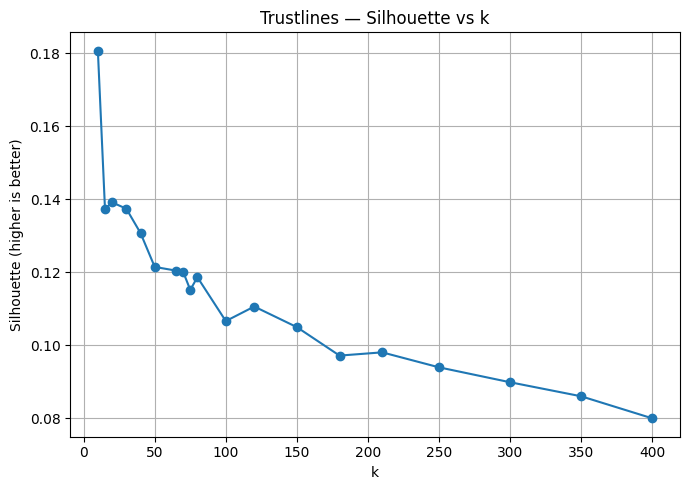

In [59]:
plt.figure(figsize=(7,5))
plt.plot(intr["k"], intr["silhouette"], marker="o")
plt.xlabel("k"); plt.ylabel("Silhouette (higher is better)")
plt.title("Trustlines — Silhouette vs k")
plt.grid(True, which="both", axis="both")
plt.tight_layout(); plt.show()

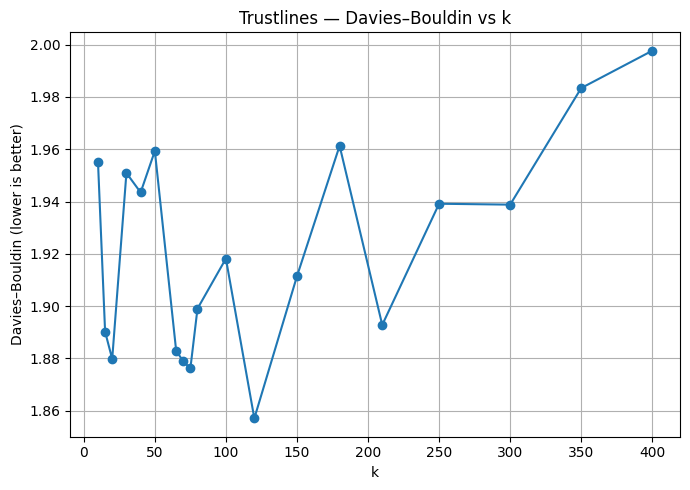

In [ ]:
plt.figure(figsize=(7,5))
plt.plot(intr["k"], intr["davies_bouldin"], marker="o")
plt.xlabel("k"); plt.ylabel("Davies–Bouldin (lower is better)")
plt.title("Trustlines — Davies–Bouldin vs k")
plt.grid(True, which="both", axis="both")
plt.tight_layout(); plt.show()

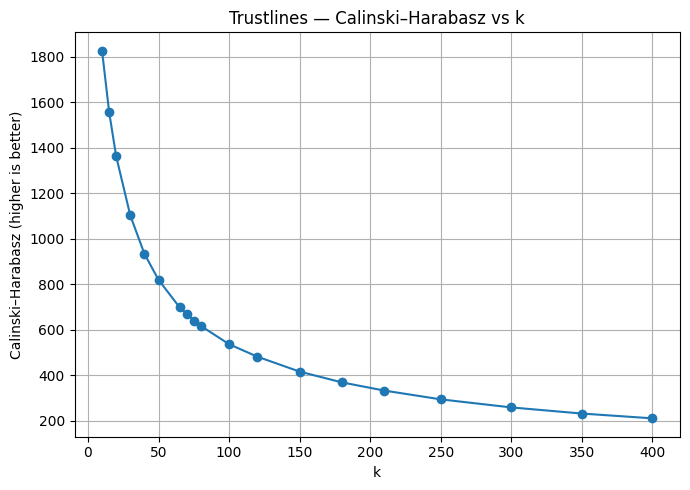

In [61]:
plt.figure(figsize=(7,5))
plt.plot(intr["k"], intr["calinski_harabasz"], marker="o")
plt.xlabel("k"); plt.ylabel("Calinski–Harabasz (higher is better)")
plt.title("Trustlines — Calinski–Harabasz vs k")
plt.grid(True, which="both", axis="both")
plt.tight_layout(); plt.show()

In [ ]:
plt.figure(figsize=(9,6))
plt.plot(k, sil_n, marker="o", label="Silhouette (normalized)")
plt.plot(k, dbi_n, marker="o", label="1 − Davies–Bouldin (normalized)")
plt.plot(k, ch_n,  marker="o", label="Calinski–Harabasz (normalized)")


ann_cfg = [
    (best_sil_idx, "Sil: k={}".format(int(k[best_sil_idx])), sil_n),
    (best_dbi_idx, "DBI: k={}".format(int(k[best_dbi_idx])), dbi_n),
    (best_ch_idx,  "CH: k={}".format(int(k[best_ch_idx])),  ch_n),
]


offsets = [(15, -10), (15, -28), (15, -46)]  

for (idx, label, series), (dx, dy) in zip(ann_cfg, offsets):
    x_val = k[idx]
    y_val = series.iloc[idx]

    plt.scatter([x_val], [y_val], s=80, zorder=5)
    plt.annotate(
        label,
        xy=(x_val, y_val),
        xytext=(dx, dy),         
        textcoords="offset points", 
        ha="left",
        va="top",
        fontsize=9,
        bbox=dict(boxstyle="round,pad=0.2", fc="white", ec="none", alpha=0.85),
        arrowprops=dict(arrowstyle="-", lw=0.5, alpha=0.7),
    )

plt.xlabel("k")
plt.ylabel("Normalized score (0–1, higher is better)")
plt.title("Intrinsic Metrics vs K Trustlines Node2Vec (normalized)")
plt.grid(True, which="both", axis="both", alpha=0.25)
plt.legend()
plt.tight_layout()
plt.show()


NameError: name 'plt' is not defined

Extrinsic vs. LPA

In [58]:
EMB_FN = "trustlines/trustlines_node2vec_kmeans_results.csv"
# LPA_FN = "../Community Detection/Label Propagation/trustline/trustlines_lpa_labels.csv"

In [59]:
def purity(y_true, y_pred):
    total = len(y_true)
    score = 0
    for c in set(y_pred):
        idx = (y_pred == c)
        mc = Counter(y_true[idx]).most_common(1)
        score += mc[0][1] if mc else 0
    return score / total

In [60]:
emb = pd.read_csv(EMB_FN)
# lblnorm = pd.read_csv(LBL_NORM)[["account_id","lpa_label"]]
lblnorm = pd.read_csv(LBL_NORM)[["account_id","name"]]

In [61]:
for col in ["account_id"]:
    try:
        emb[col] = emb[col].astype("Int64")
        lblnorm[col] = lblnorm[col].astype("Int64")
    except Exception:
        emb[col] = emb[col].astype(str)
        lblnorm[col] = lblnorm[col].astype(str)

df = emb.merge(lblnorm, on="account_id", how="inner")
print(f"Matched accounts for extrinsic eval: {len(df):,} / {len(emb):,}")

Matched accounts for extrinsic eval: 139 / 24,586


In [62]:
df_eval = df

In [63]:
k_cols = sorted([c for c in df_eval.columns if c.startswith("kmeans_")],
                key=lambda s: int(s.split("_")[1]))

In [64]:
def purity(y_true, y_pred):
    if len(y_true) == 0:
        return float("nan")
    total = len(y_true)
    score = 0
    for c in set(y_pred):
        idx = (y_pred == c)
        if idx.any():
            score += Counter(y_true[idx]).most_common(1)[0][1]
    return score / total
for col in ["account_id"]:
    try:
        emb[col] = emb[col].astype("Int64")
        lblnorm[col] = lblnorm[col].astype("Int64")
    except Exception:
        emb[col] = emb[col].astype(str)
        lblnorm[col] = lblnorm[col].astype(str)
df = emb.merge(lblnorm, on="account_id", how="inner")
k_cols = [c for c in emb.columns if c.startswith("kmeans_")]


In [65]:
rows = []
y_ref = df["name"].to_numpy()
for kcol in k_cols:
    y = df[kcol].to_numpy()
    k = int(kcol.split("_")[1])
    rows.append({
        "k": k,
        "NMI_vs_LPA": normalized_mutual_info_score(y_ref, y),
        "ARI_vs_LPA": adjusted_rand_score(y_ref, y),
        "Purity_vs_LPA": purity(y_ref, y),
    })

ext = pd.DataFrame(rows).sort_values("k").reset_index(drop=True)
display(ext)

,k,NMI_vs_LPA,ARI_vs_LPA,Purity_vs_LPA
0,10,0.211467,0.044710,0.870504
1,15,0.219068,0.032815,0.870504
2,20,0.231233,0.025766,0.877698
3,30,0.237919,0.017093,0.884892
4,40,0.236603,0.014606,0.884892
5,50,0.231099,0.010688,0.884892
6,65,0.256276,0.013752,0.906475
7,70,0.257563,0.014034,0.906475
8,75,0.252552,0.013114,0.906475
9,80,0.265276,0.011923,0.920863


ARI is highest at k=20, while NMI is marginally higher at k≈70

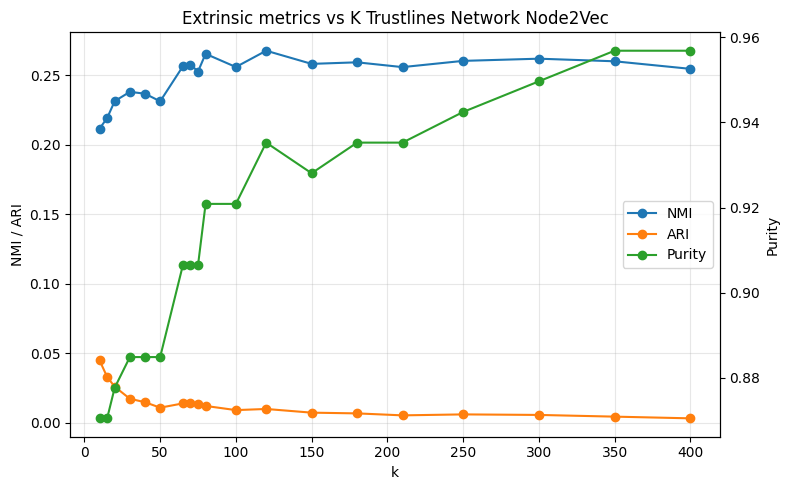

In [66]:
k   = ext["k"].astype(int)
nmi = ext["NMI_vs_LPA"]
ari = ext["ARI_vs_LPA"]
pur = ext["Purity_vs_LPA"]

fig, ax1 = plt.subplots(figsize=(8,5))
ax2 = ax1.twinx()

l1, = ax1.plot(k, nmi, marker="o", label="NMI", color="tab:blue")
l2, = ax1.plot(k, ari, marker="o", label="ARI", color="tab:orange")
l3, = ax2.plot(k, pur, marker="o", label="Purity", color="tab:green")

ax1.set_xlabel("k")
ax1.set_ylabel("NMI / ARI")
ax2.set_ylabel("Purity")

ax1.grid(True, alpha=0.3)
ax1.legend([l1, l2, l3], ["NMI", "ARI", "Purity"], loc="best")
plt.title("Extrinsic metrics vs K Trustlines Network Node2Vec")
plt.tight_layout()
plt.show()